# Bayesian Logistic Regression Modules

This notebook tests the modules that perform logistic regression.

In [43]:
### Libraries

import datetime as dt
import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc

# Library settings.
% matplotlib inline
pd.set_option('display.max_rows', 100)

In [2]:
### Custom Modules

import bayes_lr
import game_predictions

In [24]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [55]:
### Settings

# Games path.
games_path = '../../../data/games_2015_tournament.csv'

# Pre-tournament statistics path.
stats_path = '../../../data/kenpom_summaries/summary15_pt.csv'

# Tournament bracket path.
bracket_path = '../../../data/tournament_brackets/2015_64.csv'
final_four_bracket_path = '../../../data/tournament_brackets/2015_4.csv'

## Data

In [14]:
# Read games.
games = pd.read_csv(games_path)
# Trim to single group.
games = games[games.game_group == 1].reset_index(drop=True)
# 2014 games.
# games_2014 = games[games.year == 2014].reset_index(drop=True)

In [6]:
# Read stats.
pre_tournament_stats = pd.read_csv(stats_path)

In [56]:
# Read brackets.
bracket = pd.read_csv(bracket_path, header=None).values.tolist()
final_four_bracket = pd.read_csv(final_four_bracket_path, header=None).values.tolist()

## Model

In [15]:
# Features.
features = ['location_Home','diff_Tempo','diff_OE','diff_DE','diff_Pythag']
model_mcmc = bayes_lr.model_games(data=games,features=features)

In [16]:
model_mcmc.sample(10000,2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 19.9 sec

## Predict

In [119]:
y_hat_raw, y_hat, y_hat_accuracy = game_predictions.predict_games(games, features, model_mcmc=model_mcmc, method='pp')

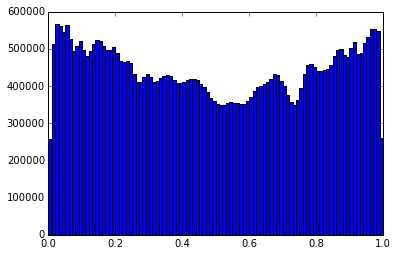

In [120]:
plt.hist(y_hat_raw.ravel(), bins=100);

## Simulate

In [121]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [122]:
# Some code to get random coefficients for testing.
coefs_all = bayes_lr.feature_coefficients(model_mcmc, features)
# print coefs_all.shape
c     = coefs_all[4000]
coefs = coefs_all[np.random.choice(len(coefs_all), size=100)]
# print coefs

In [48]:
# Output time information, simulate tournament.
print 'Start:',dt.datetime.now()
final_four_outcomes = game_predictions.simulate_tournament(final_four_bracket, pre_tournament_stats, features, model_mcmc=model_mcmc)
print 'End:  ',dt.datetime.now()

Start: 2015-05-01 22:58:32.432689
End:   2015-05-01 23:06:45.188741


In [49]:
final_four_outcomes

,wins_round_1,wins_round_2
Duke,7226,3573
Kentucky,3960,2194
Michigan St.,774,5
Wisconsin,4040,2228


In [ ]:
# Output time information, simulate tournament.
print 'Start:',dt.datetime.now()
% timeit tournament_outcomes = game_predictions.simulate_tournament(bracket, pre_tournament_stats, features, model_mcmc=model_mcmc)
print 'End:  ',dt.datetime.now()

In [ ]:
tournament_outcomes